In [31]:
import threading
import uuid
from concurrent.futures import ThreadPoolExecutor, as_completed
from collections import Counter
import matplotlib.pyplot as plt
from time import sleep
from utils.datasets import get_dataset

thread_local = threading.local()
uid_log = []  # Global list to collect UID usage

# Simulated OpenAI client
class FakeClient:
    def __init__(self):
        self.uid = str(uuid.uuid4())
        #print(f"[Init] Created FakeClient with UID: {self.uid}")

    def process(self, sample):
        sample["uid"] = self.uid
        return sample

def get_client():
    if not hasattr(thread_local, "client"):
        thread_local.client = FakeClient()
    return thread_local.client

def process_entry(entry):
    client = get_client()
    uid_log.append(client.uid)
    #print(f"[Debug] Entry '{entry}' handled by UID: {client.uid}")
    sleep(1)
    return client.process(entry)

def run_debug(dataset, max_workers=4):
    results = []
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        results = executor.map(process_entry, dataset)
    return results


In [19]:
ds = get_dataset("HotpotQA")

In [36]:
results = run_debug(ds, max_workers=100)

In [37]:
import pandas as pd
results = pd.DataFrame(results)
results

,id,question,answer,type,level,uid
0,5ae3cfe05542990afbd1e1e3,"Which airport is located in Maine, Sacramento ...",Knox County Regional Airport,comparison,medium,23446e1c-01db-4038-9237-7b95025eeafc
1,5abc1abf5542993a06baf87f,Peter Hobbs founded the company that is based ...,Failsworth,bridge,medium,953d135a-7da2-4c49-b939-f3ea924da8b7
2,5ac250eb5542992f1f2b384f,What direction does the river that Austrolebia...,north to south,bridge,medium,1fafa059-a143-42e0-a579-bd6d5b2dddbf
3,5a81a60455429903bc27b990,Were both Gabriela Mistral and G. K. Chesterto...,yes,comparison,medium,48d58d09-2684-4787-983a-93381bad4bcd
4,5a70fb2d5542994082a3e482,"What city, other than San Jose del Cabo, is at...",Cabo San Lucas,bridge,medium,3922433a-15a7-4568-b9db-e64587e17d76
...,...,...,...,...,...,...
495,5ab9121555429919ba4e238a,Still Da Baddest is the fourth studio album by...,Keyshia Cole,bridge,easy,6b9bc0c5-2f55-480c-b874-765539c3e645
496,5a8641ab554299211dda2ace,Renowned persons Lee Tamahori and Robert Gregs...,filmmaker,comparison,medium,ac00e2ce-5f88-40cf-81b2-b7e47dcd2b67
497,5abb69f25542996cc5e49fea,Which Italian port do many of the inhabitants ...,Genoa,bridge,medium,faa577f7-10e6-49f3-a359-aa1d9893cc35
498,5ab982b3554299753720f823,Square One Shopping Centre's size allows it to...,China,bridge,medium,a03f4038-a6b4-4eda-a7ed-dec68a306d0c


In [40]:
#

[Init] Created FakeClient with UID: 9e3c8bc0-f328-4cb1-86ca-29651800dc3a
[Init] Created FakeClient with UID: 82f1de5e-61f3-49b6-a865-72ca1cb1f4d4
[Init] Created FakeClient with UID: 2d2f925a-13fc-4c0a-a907-9b8d1ea3ac46
[Init] Created FakeClient with UID: 57ea7d82-cacc-40b5-bdfa-ed44a50943da
[Init] Created FakeClient with UID: ba3d23c2-42b9-494a-b754-6220f46123be
[Init] Created FakeClient with UID: acd9a333-8a8d-42c6-b7f1-afc6720748dc
[Init] Created FakeClient with UID: 88b5a7e8-cb72-4366-8aac-10a121cb00d8
[Init] Created FakeClient with UID: 88c204ee-bf04-481c-98e1-daffb26dd0d8
[Init] Created FakeClient with UID: 96e065b3-dab6-4c95-8bf6-39050cf78397
[Init] Created FakeClient with UID: 65e01cdd-a3ba-45b2-ba06-96f98e5c8827


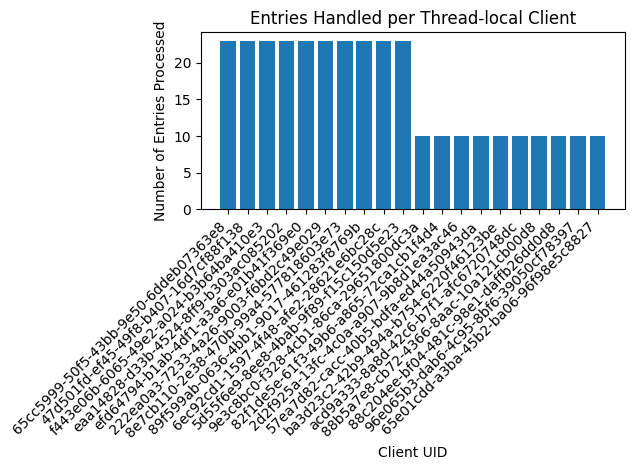

In [16]:
# Run the debug processor
dataset = [f"sample {i}" for i in range(100)]
results = run_debug(dataset, max_workers=10)

# Count how many times each UID was used
uid_counts = Counter(uid_log)

# Plot the counts
plt.bar(uid_counts.keys(), uid_counts.values())
plt.xlabel("Client UID")
plt.ylabel("Number of Entries Processed")
plt.title("Entries Handled per Thread-local Client")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [41]:
import wandb

In [44]:
# 1. Initialize the API
# This is your gateway to all your W&B data
api = wandb.Api()

# The path is "entity/project"
# You can find your entity (username or team name) in your W&B profile.
ARTIFACTS_COLLECTION_PATH = "hofbauer/ablation_study"

# 2. Get all artifacts of a specific TYPE
# This is the first level of filtering. We only want 'evaluation_results'.
all_eval_artifacts = api.artifacts(type_name="inference",
    name=ARTIFACTS_COLLECTION_PATH
)
